<a href="https://colab.research.google.com/github/ujjwalrajput31/eda/blob/main/Object_Detection_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Convolution2D,MaxPool2D,Flatten,BatchNormalization,Dropout

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
Train = keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/cat dog",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 697 files belonging to 2 classes.


In [5]:
Test=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/cat dog/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256))

Found 140 files belonging to 2 classes.


In [6]:
def process( image,labels):
  image=tf.cast(image/255. ,tf.float32)
  return image,labels

In [7]:
train= Train.map(process)
test=Test.map(process)

In [8]:
list(Train)[0][0]

<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[185.26953 , 178.26953 , 170.26953 ],
         [178.34787 , 169.34787 , 160.34787 ],
         [168.35156 , 158.35156 , 148.35156 ],
         ...,
         [161.78879 , 161.78879 , 152.1677  ],
         [153.89084 , 150.75977 , 141.4976  ],
         [155.31519 , 149.31519 , 137.31519 ]],

        [[181.29297 , 174.29297 , 166.29297 ],
         [180.77606 , 171.77606 , 162.77606 ],
         [172.19531 , 162.19531 , 152.19531 ],
         ...,
         [167.79602 , 170.76367 , 164.37024 ],
         [161.11523 , 161.91864 , 154.20312 ],
         [160.19162 , 157.89693 , 148.63303 ]],

        [[176.20898 , 169.20898 , 161.20898 ],
         [183.65234 , 174.65234 , 165.65234 ],
         [180.57812 , 170.57812 , 160.57812 ],
         ...,
         [173.21234 , 178.79883 , 176.30112 ],
         [168.35938 , 172.3164  , 167.96875 ],
         [166.6289  , 168.387   , 162.71512 ]],

        ...,

        [[211.20898 , 220.09319 ,

**CNN**

In [9]:
model=Sequential()

In [10]:
model.add(
    Convolution2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))
)

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(
    Convolution2D(64,kernel_size=(3,3),padding='valid',activation='relu')
)

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [12]:
model.add(
    Convolution2D(128,kernel_size=(3,3),padding='valid',activation='relu')
)

model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

In [13]:
model.add(Flatten())

**ANN**

In [14]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [15]:
model.summary

<bound method Model.summary of <Sequential name=sequential, built=True>>

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.fit(train,epochs=5)

Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 25s 519ms/step - accuracy: 0.6736 - loss: 3.5942
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.7134 - loss: 2.5932
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.7419 - loss: 2.1077
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - accuracy: 0.7865 - loss: 1.8380
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - accuracy: 0.7360 - loss: 1.7221


In [18]:
import cv2
import matplotlib.pyplot as plt

In [26]:
timage=cv2.imread("/content/dog_4.jpg")

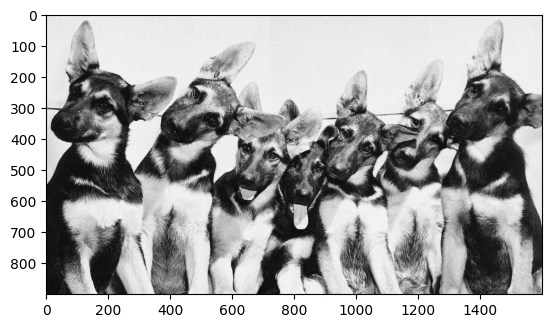

In [27]:
if timage is not None:
    plt.imshow(timage)
else:
    print("Error: Image could not be loaded. Please check the file path and ensure the image exists.")

In [28]:
if timage is not None:
    # Convert BGR to RGB
    timage_rgb = cv2.cvtColor(timage, cv2.COLOR_BGR2RGB)
    input_ = cv2.resize(timage_rgb, (256, 256))
    input_ = input_.reshape(1, 256, 256, 3)
    print("Image prepared for model input.")
else:
    print("Cannot process image as it was not loaded successfully in previous steps.")
    input_ = None # Ensure input_ is None if image loading failed

Image prepared for model input.


In [29]:
"dog" if model.predict(input_)[0][0] > 0.5 else "cat"

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


'dog'

In [30]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy as np

In [34]:
model=ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [40]:
image1=r"/content/stylish-living-room_305343-7213.webp"

In [41]:
im=image.load_img(image1,target_size=(224,224))
x=image.img_to_array(im)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [42]:
pred=model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [44]:
decode_predictions(pred, top=5)[0]

[('n04344873', 'studio_couch', np.float32(0.42998445)),
 ('n03388549', 'four-poster', np.float32(0.2220364)),
 ('n04239074', 'sliding_door', np.float32(0.05520717)),
 ('n03788365', 'mosquito_net', np.float32(0.037014466)),
 ('n03131574', 'crib', np.float32(0.033360947))]